In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [2]:
fs = 512
N = fs
n = np.arange(N)
k = np.arange(N).reshape((N,1))
W_k_n_N = np.exp(-2j * np.pi * k * n / N)

In [3]:
frequency = 220
signal_array = np.sin(np.linspace(0, 2 * np.pi, fs, endpoint=True) * frequency)

In [4]:
signal_array_f = np.dot(W_k_n_N, signal_array)
magnitude = np.abs(signal_array_f)
phase = np.angle(signal_array_f)

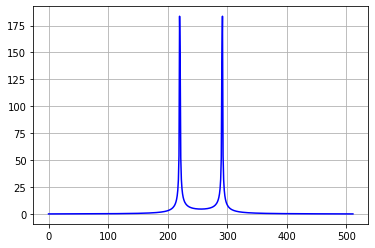

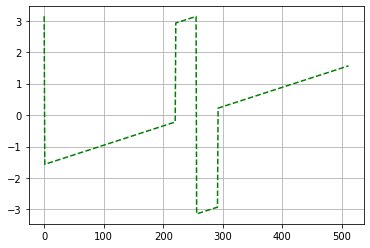

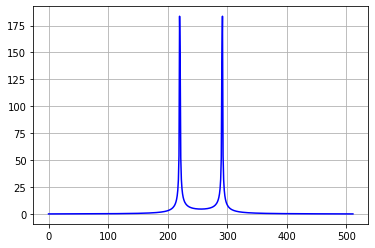

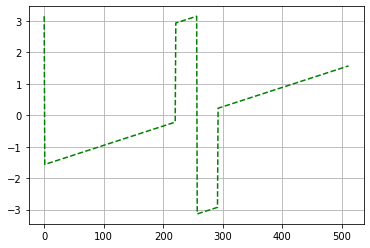

In [5]:
plt.figure(1)
plt.plot(magnitude,'b')
plt.grid()

plt.figure(2)
plt.plot(phase,'g--')
plt.grid()

plt.figure(3)
plt.plot(np.abs(np.fft.fft(signal_array)), 'b')
plt.grid()

plt.figure(4)
plt.plot(np.angle(np.fft.fft(signal_array)), 'g--')
plt.grid()

plt.show()

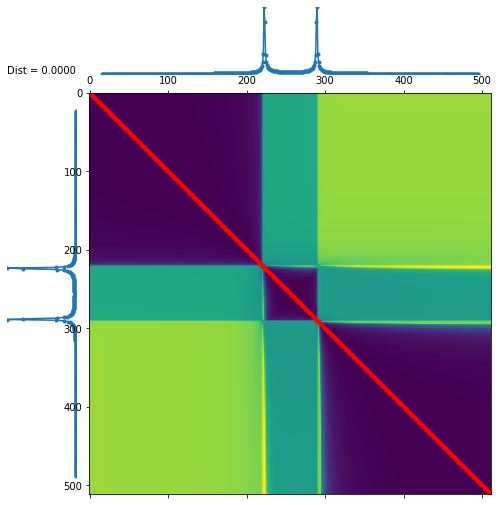

In [6]:
s1 = magnitude
s2 = np.abs(np.fft.fft(signal_array))
            
distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
fig, axes = dtwvis.plot_warpingpaths(s1, s2, paths, best_path)
fig.set_size_inches(7, 7)

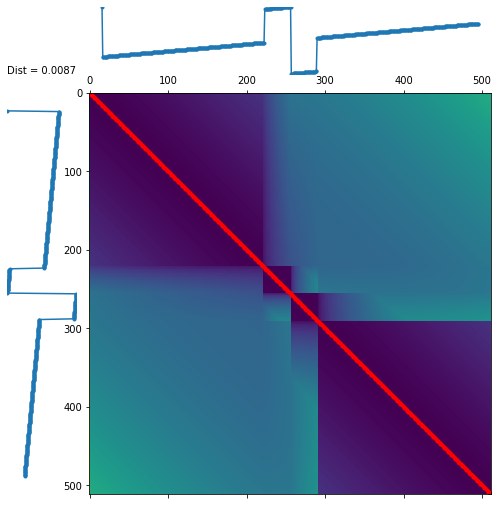

In [7]:
s1 = phase
s2 = np.angle(np.fft.fft(signal_array))
            
distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
fig, axes = dtwvis.plot_warpingpaths(s1, s2, paths, best_path)
fig.set_size_inches(7, 7)